In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
transactions=pd.read_excel(df,'Transactions')

In [5]:
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0


In [6]:
print(transactions.shape)

(20000, 13)


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [11]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [12]:
transactions['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [13]:
transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [14]:
transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [15]:
transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [16]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [17]:
feature_with_nan=[feature for feature in transactions.columns if  transactions[feature].isnull().sum()]
for feature in feature_with_nan:
    print(feature,np.round(transactions[feature].isnull().mean()*100,4), '%missing values')

online_order 1.8 %missing values
brand 0.985 %missing values
product_line 0.985 %missing values
product_class 0.985 %missing values
product_size 0.985 %missing values
standard_cost 0.985 %missing values
product_first_sold_date 0.985 %missing values


<AxesSubplot:>

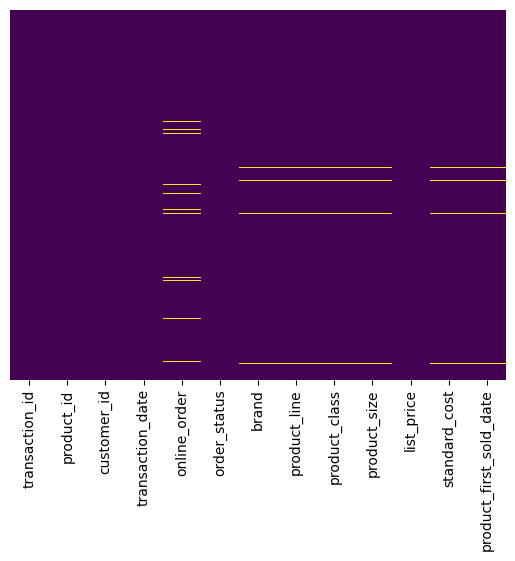

In [18]:
sns.heatmap(transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
#Handled missing values with the mode [Repetative value]
transactions=transactions.copy()
transactions['online_order']=transactions['online_order'].fillna(transactions['online_order'].mode()[0])
transactions['brand']=transactions['brand'].fillna(transactions['brand'].mode()[0])
transactions['product_line']=transactions['product_line'].fillna(transactions['product_line'].mode()[0])
transactions['product_class']=transactions['product_class'].fillna(transactions['product_class'].mode()[0])
transactions['product_size']=transactions['product_size'].fillna(transactions['product_size'].mode()[0])
transactions['standard_cost']=transactions['standard_cost'].fillna(transactions['standard_cost'].median())
transactions['product_first_sold_date']=transactions['product_first_sold_date'].fillna(transactions['product_first_sold_date'].median())


In [20]:
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [21]:
transactions['list_price']=transactions['list_price'].astype('int64')
transactions['standard_cost']=transactions['standard_cost'].astype('int64')

In [23]:
transactions['transaction_date']=transactions['transaction_date'].astype(str).str[:4]

In [26]:
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017,0.0,Approved,Solex,Standard,medium,medium,71,53,41245.0
1,2,3,3120,2017,1.0,Approved,Trek Bicycles,Standard,medium,large,2091,388,41701.0
2,3,37,402,2017,0.0,Approved,OHM Cycles,Standard,low,medium,1793,248,36361.0


In [173]:
transactions.to_excel('./transactions_cleaned.xlsx',index=False)


In [111]:
newCustomerList=pd.read_excel(df,'NewCustomerList')

C:\Users\Ajju\AppData\Local\Temp\ipykernel_7904\633721754.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  newCustomerList=pd.read_excel(df,'NewCustomerList')


In [112]:
newCustomerList.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.42,0.525,0.65625,0.557812,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.68,0.680,0.85000,0.722500,1,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.73,0.730,0.73000,0.730000,1,1,1.71875


In [113]:
newCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [114]:
newCustomerList=newCustomerList.copy()
from datetime import date
def age(DOB):
    today=date.today()
    age=today.year-DOB.year
    return age
Age=newCustomerList['DOB'].apply(age)
newCustomerList['age']=Age
print(Age)

0      65.0
1      52.0
2      48.0
3      43.0
4      57.0
       ... 
995    63.0
996    21.0
997    68.0
998    70.0
999    67.0
Name: DOB, Length: 1000, dtype: float64


In [115]:
newCustomerList.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.42,0.525,0.65625,0.557812,1,1,1.71875,65.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.68,0.680,0.85000,0.722500,1,1,1.71875,52.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.73,0.730,0.73000,0.730000,1,1,1.71875,48.0


In [116]:
newCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value', 'age'],
      dtype='object')

In [117]:
newCustomerList.drop(['DOB','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'],axis=1,inplace=True)

In [118]:
newCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.0
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,52.0
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.0
3,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,43.0
4,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.0


In [119]:
newCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
age                                     17
dtype: int64

In [120]:
newCustomerList['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [121]:
feature_with_null=[feature for feature in newCustomerList.columns if  newCustomerList[feature].isnull().sum()]
for feature in feature_with_null:
    print(feature,np.round(newCustomerList[feature].isnull().mean()*100,4), '%missing values')

last_name 2.9 %missing values
job_title 10.6 %missing values
job_industry_category 16.5 %missing values
age 1.7 %missing values


<AxesSubplot:>

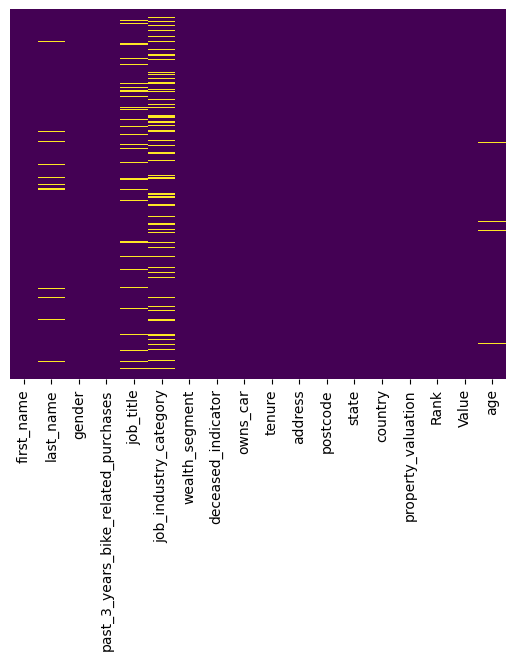

In [122]:
sns.heatmap(newCustomerList.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [123]:
newCustomerList['last_name']=newCustomerList['last_name'].fillna(newCustomerList['last_name'].mode()[0])
newCustomerList['job_title']=newCustomerList['job_title'].fillna(newCustomerList['job_title'].mode()[0])
newCustomerList['job_industry_category']=newCustomerList['job_industry_category'].fillna(newCustomerList['job_industry_category'].mode()[0])
newCustomerList['age']=newCustomerList['age'].fillna(newCustomerList['age'].median())


In [99]:
newCustomerList['age']=newCustomerList['age'].astype(str).str[:2]

In [124]:
newCustomerList.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
dtype: int64

In [125]:
newCustomerList['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [126]:
# rounding the values after decimal in Value column
newCustomerList['Value'] = newCustomerList['Value'].round(3)
newCustomerList.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719,65.0
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719,52.0
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719,48.0


<AxesSubplot:xlabel='age', ylabel='Count'>

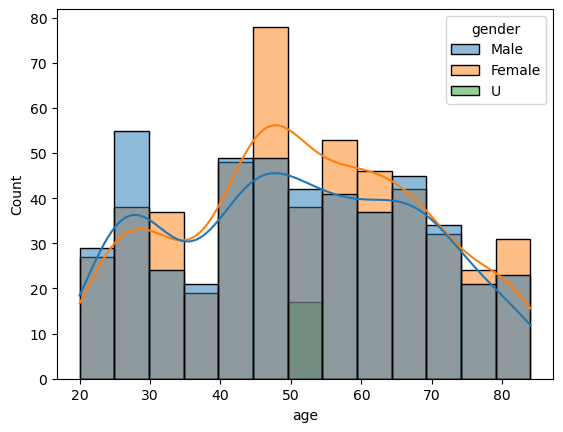

In [129]:
sns.histplot(data=newCustomerList, x='age', hue='gender',kde=True)

(array([42., 52., 55., 45., 26., 30., 52., 65., 80., 81., 62., 58., 53.,
        47., 57., 67., 29., 29., 24., 46.]),
 array([20. , 23.2, 26.4, 29.6, 32.8, 36. , 39.2, 42.4, 45.6, 48.8, 52. ,
        55.2, 58.4, 61.6, 64.8, 68. , 71.2, 74.4, 77.6, 80.8, 84. ]),
 <BarContainer object of 20 artists>)

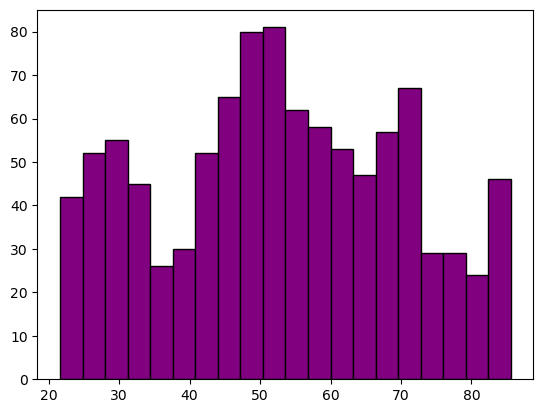

In [130]:
plt.hist(newCustomerList['age'], bins=20, align='right', color='purple', edgecolor='black')

In [174]:
newCustomerList.to_excel('./newCustomerList_cleaned.xlsx',index=False)


In [145]:
customerDemographic=pd.read_excel(df,'CustomerDemographic')

C:\Users\Ajju\AppData\Local\Temp\ipykernel_7904\717465091.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customerDemographic=pd.read_excel(df,'CustomerDemographic')


In [146]:
customerDemographic.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0


In [163]:
customerDemographic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            4000 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   job_title                            4000 non-null   object 
 6   job_industry_category                4000 non-null   object 
 7   wealth_segment                       4000 non-null   object 
 8   deceased_indicator                   4000 non-null   object 
 9   owns_car                             4000 non-null   object 
 10  tenure                               4000 non-null   float64
 11  customer_age                  

In [148]:
customerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [149]:
customerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [150]:
customerDemographic.duplicated().sum()

0

In [151]:
#drop default column due to corrupted data
customerDemographic.drop(['default'],axis=1,inplace=True)

In [152]:
customerDemographic=customerDemographic.copy()
from datetime import date
def customer_age(DOB):
    today=date.today()
    customer_age=today.year-DOB.year
    return customer_age
Age=customerDemographic['DOB'].apply(customer_age)
customerDemographic['customer_age']= Age
print(Age)

0       69.0
1       42.0
2       68.0
3       61.0
4       45.0
        ... 
3995    47.0
3996    21.0
3997     NaN
3998    49.0
3999    31.0
Name: DOB, Length: 4000, dtype: float64


In [166]:
customerDemographic['customer_age'] = pd.to_datetime(customerDemographic['customer_age'])

In [153]:
feature_with_na=[feature for feature in customerDemographic.columns if  customerDemographic[feature].isnull().sum()]
for feature in feature_with_na:
    print(feature,np.round(customerDemographic[feature].isnull().mean()*100,4), '%missing values')

last_name 3.125 %missing values
DOB 2.175 %missing values
job_title 12.65 %missing values
job_industry_category 16.4 %missing values
tenure 2.175 %missing values
customer_age 2.175 %missing values


<AxesSubplot:>

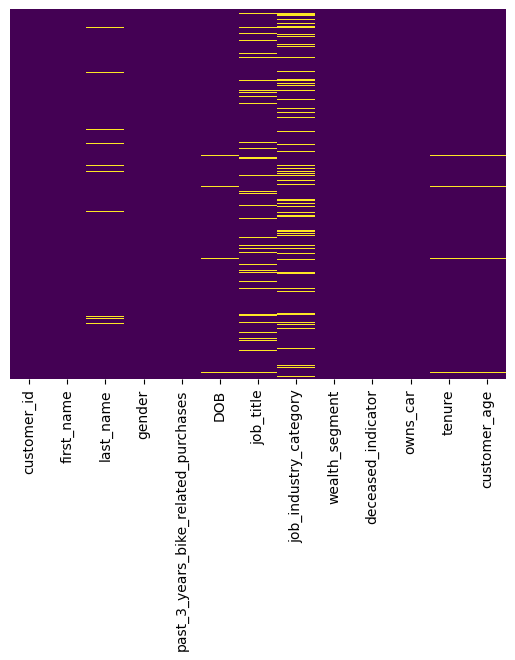

In [154]:
sns.heatmap(customerDemographic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [155]:
customerDemographic['last_name']=customerDemographic['last_name'].fillna(customerDemographic['last_name'].mode()[0])
customerDemographic['job_title']=customerDemographic['job_title'].fillna(customerDemographic['job_title'].mode()[0])
customerDemographic['job_industry_category']=customerDemographic['job_industry_category'].fillna(customerDemographic['job_industry_category'].mode()[0])
customerDemographic['customer_age']=customerDemographic['customer_age'].fillna(customerDemographic['customer_age'].median())
customerDemographic['tenure']=customerDemographic['tenure'].fillna(customerDemographic['tenure'].median())


<AxesSubplot:xlabel='customer_age', ylabel='Count'>

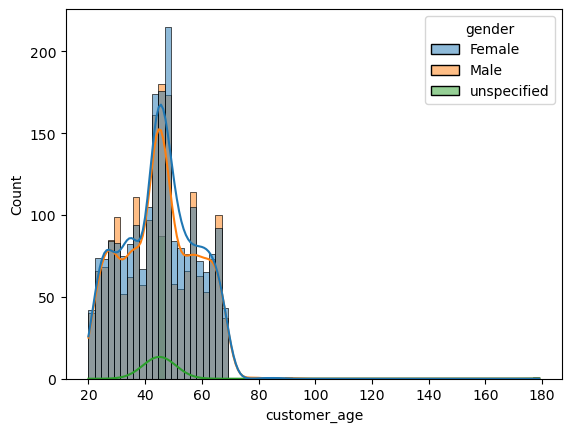

In [161]:
sns.histplot(data=customerDemographic, x='customer_age', hue='gender',kde=True)

(array([4.53e+02, 5.32e+02, 6.49e+02, 1.19e+03, 5.55e+02, 5.35e+02,
        8.00e+01, 3.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([ 20.  ,  27.95,  35.9 ,  43.85,  51.8 ,  59.75,  67.7 ,  75.65,
         83.6 ,  91.55,  99.5 , 107.45, 115.4 , 123.35, 131.3 , 139.25,
        147.2 , 155.15, 163.1 , 171.05, 179.  ]),
 <BarContainer object of 20 artists>)

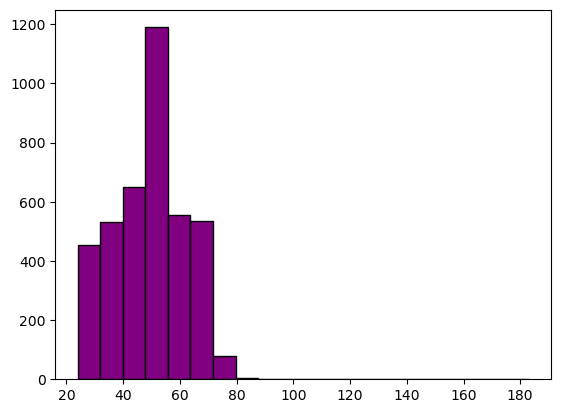

In [162]:
plt.hist(customerDemographic['customer_age'], bins=20, align='right', color='purple', edgecolor='black')

In [156]:
customerDemographic.drop(['DOB'],axis=1,inplace=True)

In [157]:
customerDemographic.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,customer_age
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,68.0


In [158]:
customerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [159]:
customerDemographic['gender']=customerDemographic['gender'].replace('U','unspecified').replace('F','Female').replace('M','Male').replace('Femal','Female')

In [160]:
customerDemographic['gender'].value_counts()

Female         2039
Male           1873
unspecified      88
Name: gender, dtype: int64

In [175]:
customerDemographic.to_excel('./customerDemographic_cleaned.xlsx',index=False)


In [171]:
customerAddress=pd.read_excel(df,'CustomerAddress')

In [59]:
customerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [57]:
customerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [61]:
customerAddress.isnull().sum()


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [63]:
customerAddress['customer_id'].value_counts()


1       1
2676    1
2663    1
2664    1
2665    1
       ..
1343    1
1344    1
1345    1
1346    1
4003    1
Name: customer_id, Length: 3999, dtype: int64

In [64]:
customerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [176]:
customerAddress.to_excel('./customerAddress_cleaned.xlsx',index=False)
